In [8]:
# pip install apify-client

## 🧰 Step 1: Import Required Packages
Import all necessary libraries for data manipulation, visualization, machine learning, and statistical modeling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## ❄️ Step 2: Connect to Snowflake and Load Data
Use SQLAlchemy to connect to Snowflake and extract video-level creator metadata from the transformed `mart_author` and `mart_post` table.


In [ ]:
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine

engine = create_engine(URL(
    user=snowflake_user,
    password=snowflake_password,
    account=snowflake_account,
    warehouse=snowflake_warehouse,
    database=snowflake_database,
    schema=snowflake_schema
))


In [12]:
# Load mart_post
mart_post = pd.read_sql("SELECT * FROM mart_post", con=engine)

# Load mart_author (optional if needed)
mart_author = pd.read_sql("SELECT * FROM mart_author", con=engine)


In [13]:
mart_post

,posturl,webvideourl,caption,ads,mute,likes,shares,views,comments,duration_sec,...,share_rate,comment_rate,is_labubu,is_skullpanda,is_crybaby,is_hirono,is_unboxing,is_blindbox,is_recommendation,is_cute
0,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,https://www.tiktok.com/@gamerishcat54/video/75...,Hope everyone gets the labubu they want 👀#Popm...,NotAds,NotMuted,943,69,85700,33,80,...,0.000805,0.000385,1,0,0,0,1,1,0,0
1,https://p16-pu-sign-useast8.tiktokcdn-us.com/t...,https://www.tiktok.com/@sweetpeamona/video/752...,Christmas in July?! Tonight on @POP MART US LO...,NotAds,NotMuted,77,25,7053,45,98,...,0.003545,0.006380,1,0,1,1,1,1,0,0
2,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,https://www.tiktok.com/@ebony.influences/video...,POP MART Español may potentially drop the rare...,NotAds,NotMuted,504,32,14600,76,42,...,0.002192,0.005205,1,0,0,0,0,0,0,0
3,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://www.tiktok.com/@b.eauty_b.east/video/7...,Unboxing these is so exciting until you open a...,NotAds,NotMuted,142,18,5384,34,125,...,0.003343,0.006315,0,0,0,0,0,1,0,0
4,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,https://www.tiktok.com/@malloryfig/video/75255...,my luck is definitely insane😹🙏🏼 just like defi...,NotAds,NotMuted,5102,49,28500,51,111,...,0.001719,0.001789,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,https://p16-common-sign-sg.tiktokcdn-us.com/to...,https://www.tiktok.com/@win.william_official/v...,#popmart #crybaby #popmart #labubu,Ads,NotMuted,372000,5503,6200000,1379,36,...,0.000888,0.000222,1,0,1,0,0,0,0,0
613,https://p16-common-sign-sg.tiktokcdn-us.com/to...,https://www.tiktok.com/@pinkjelly.charms/video...,"✨NEW DROP✨\nCARE BEARS – Sunday, June 29 @ 5PM...",NotAds,NotMuted,371200,93500,8100000,5599,30,...,0.011543,0.000691,1,0,1,0,0,1,0,0
614,https://p16-pu-sign-useast8.tiktokcdn-us.com/t...,https://www.tiktok.com/@kira.kabuki/video/7491...,Did you grow up with Teletubbies?!\n•\n@POP MA...,NotAds,NotMuted,170800,19400,3000000,1453,348,...,0.006467,0.000484,0,0,0,0,0,1,0,0
615,https://p16-pu-sign-no.tiktokcdn-eu.com/tos-no...,https://www.tiktok.com/@ninacreations/video/74...,Labubu o Nommi ? Ti prego sono troppo belleee...,NotAds,NotMuted,5170,785,112500,207,86,...,0.006978,0.001840,0,0,0,0,0,1,0,0


## 🔍 Step 3: EDA, Correlation Analysis, and Feature Preparation
Conduct exploratory data analysis (EDA), check nulls, transform datetime columns, visualize correlations, define initial feature list, and prepare tools for feature encoding and scaling. Assess skewed distributions to determine if log transformation is needed.


In [14]:
mart_author.isnull().sum()

author               0
nickname             0
followers            0
videoscount          0
accounttype          0
accountstatus        0
sellerstatus         0
posturl              0
webvideourl          0
caption              2
ads                  0
mute                 0
likes                0
shares               0
views                0
comments             0
duration_sec         0
created_at           0
engagement_rate      0
like_rate            0
share_rate           0
comment_rate         0
is_labubu            0
is_skullpanda        0
is_crybaby           0
is_hirono            0
is_unboxing          0
is_blindbox          0
is_recommendation    0
is_cute              0
dtype: int64

In [15]:
mart_author['created_at'] = pd.to_datetime(mart_author['created_at'])
mart_author['created_at']

0     2025-07-11 17:37:19+00:00
1     2025-07-11 06:44:01+00:00
2     2025-07-07 21:35:03+00:00
3     2025-07-11 11:39:15+00:00
4     2025-06-13 19:55:08+00:00
                 ...           
614   2024-04-09 07:45:07+00:00
615   2024-03-01 18:23:30+00:00
616   2024-05-19 02:29:15+00:00
617   2024-12-15 04:49:40+00:00
618   2025-05-19 04:18:30+00:00
Name: created_at, Length: 619, dtype: datetime64[ns, UTC]

In [16]:
mart_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   posturl            617 non-null    object 
 1   webvideourl        617 non-null    object 
 2   caption            617 non-null    object 
 3   ads                617 non-null    object 
 4   mute               617 non-null    object 
 5   likes              617 non-null    int64  
 6   shares             617 non-null    int64  
 7   views              617 non-null    int64  
 8   comments           617 non-null    int64  
 9   duration_sec       617 non-null    int64  
 10  created_at         617 non-null    object 
 11  musicname          617 non-null    object 
 12  musicalbum         99 non-null     object 
 13  musicauthor        617 non-null    object 
 14  musictype          617 non-null    object 
 15  engagement_rate    617 non-null    float64
 16  like_rate          617 non

In [17]:
mart_post.select_dtypes('object').describe()

,posturl,webvideourl,caption,ads,mute,created_at,musicname,musicalbum,musicauthor,musictype
count,617,617,617,617,617,617,617,99,617,617
unique,617,617,617,2,1,617,239,86,423,2
top,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,https://www.tiktok.com/@gamerishcat54/video/75...,Hope everyone gets the labubu they want 👀#Popm...,NotAds,NotMuted,2025-07-11T10:05:07.000Z,original sound,カフェでボサノバを聴く休日,POP MART,Original
freq,1,1,1,587,617,1,250,4,24,453


In [18]:
mart_author.columns

Index(['author', 'nickname', 'followers', 'videoscount', 'accounttype',
       'accountstatus', 'sellerstatus', 'posturl', 'webvideourl', 'caption',
       'ads', 'mute', 'likes', 'shares', 'views', 'comments', 'duration_sec',
       'created_at', 'engagement_rate', 'like_rate', 'share_rate',
       'comment_rate', 'is_labubu', 'is_skullpanda', 'is_crybaby', 'is_hirono',
       'is_unboxing', 'is_blindbox', 'is_recommendation', 'is_cute'],
      dtype='object')

<Axes: >

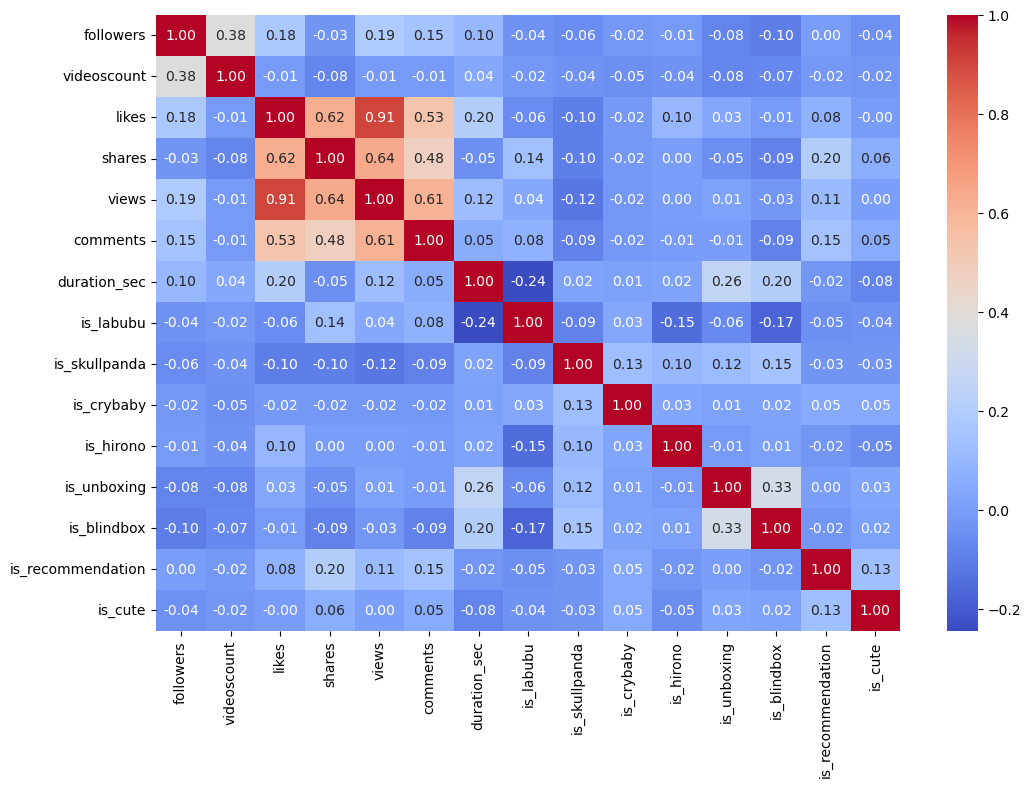

In [19]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(mart_author.select_dtypes('int','float').corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [20]:
feature_name_reg = [
    'followers',
    'videoscount',
    'ads',
    'duration_sec',
    'is_labubu',
    'is_skullpanda',
    'is_crybaby',
    'is_hirono',
    'is_unboxing',
    'is_blindbox',
    'is_recommendation',
    'is_cute'
]

In [22]:
le = LabelEncoder()
sc = StandardScaler()

In [23]:
x_reg = mart_author[feature_name_reg]
y_reg_views = mart_author[['views']]
y_reg_likes = mart_author[['likes']]
y_reg_share = mart_author[['shares']]
y_reg_comment = mart_author[['comments']]

## 🔍 Feature Distribution Analysis & Preprocessing Decisions

Before modeling, we examined the distribution of key numeric features such as `followers`, `videoscount`, and `duration_sec`. These variables were found to be right-skewed, indicating the need for a log transformation to normalize their scale.

Following transformation, standard scaling was applied to ensure numerical stability and prevent features with larger scales from dominating the model. Categorical variables such as `ads` were encoded using LabelEncoder, and binary flags (e.g., `is_labubu`, `is_cute`) were retained as-is given their 0/1 format.

This preprocessing ensured compatibility across all regression models while preserving interpretability and comparability of coefficients.


In [24]:
x_reg.columns

Index(['followers', 'videoscount', 'ads', 'duration_sec', 'is_labubu',
       'is_skullpanda', 'is_crybaby', 'is_hirono', 'is_unboxing',
       'is_blindbox', 'is_recommendation', 'is_cute'],
      dtype='object')

array([[<Axes: title={'center': 'followers'}>,
        <Axes: title={'center': 'videoscount'}>,
        <Axes: title={'center': 'duration_sec'}>],
       [<Axes: title={'center': 'is_labubu'}>,
        <Axes: title={'center': 'is_skullpanda'}>,
        <Axes: title={'center': 'is_crybaby'}>],
       [<Axes: title={'center': 'is_hirono'}>,
        <Axes: title={'center': 'is_unboxing'}>,
        <Axes: title={'center': 'is_blindbox'}>],
       [<Axes: title={'center': 'is_recommendation'}>,
        <Axes: title={'center': 'is_cute'}>, <Axes: >]], dtype=object)

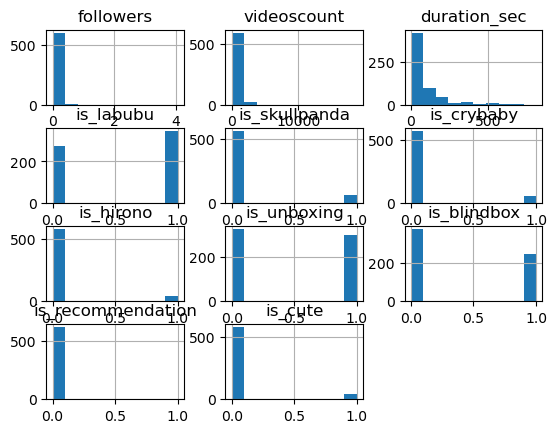

In [25]:
x_reg.hist()

## ✂️ Step 4: Train-Test Split and Feature Engineering
Split data into training and testing sets. Apply log transformation to skewed numeric columns, scale features, and encode categorical variables to prepare input for model training.

In [26]:
x_reg_train, x_reg_test, y_reg_views_train, y_reg_views_test = train_test_split(x_reg, y_reg_views, test_size = 0.3, random_state = 42)

In [27]:
x_reg_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 409 to 102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   followers          433 non-null    int64 
 1   videoscount        433 non-null    int64 
 2   ads                433 non-null    object
 3   duration_sec       433 non-null    int64 
 4   is_labubu          433 non-null    int64 
 5   is_skullpanda      433 non-null    int64 
 6   is_crybaby         433 non-null    int64 
 7   is_hirono          433 non-null    int64 
 8   is_unboxing        433 non-null    int64 
 9   is_blindbox        433 non-null    int64 
 10  is_recommendation  433 non-null    int64 
 11  is_cute            433 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 44.0+ KB


In [28]:
x_reg_train[['followers','videoscount','duration_sec']] = sc.fit_transform(x_reg_train[['followers','videoscount','duration_sec']].apply(np.log1p))
x_reg_train['ads'] = le.fit_transform(x_reg_train['ads'])
x_reg_train

,followers,videoscount,ads,duration_sec,is_labubu,is_skullpanda,is_crybaby,is_hirono,is_unboxing,is_blindbox,is_recommendation,is_cute
409,1.101838,1.010533,1,1.280059,0,0,0,0,1,1,0,0
434,1.371975,1.035513,1,1.766438,1,0,0,0,1,1,0,0
33,0.773393,0.700810,1,0.697548,0,0,0,0,1,1,0,0
0,0.056395,0.884138,1,-0.048033,1,0,0,0,0,0,0,0
612,-0.417052,-1.595987,1,-1.053541,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.445655,0.499724,1,-1.188817,1,0,0,0,1,0,0,0
106,-0.291603,-0.172020,1,-0.591528,1,0,0,0,0,0,0,0
270,-0.439728,-0.199245,1,-0.251541,1,0,0,0,0,0,0,0
435,0.991970,0.298748,0,-0.591528,1,0,0,0,0,1,0,0


In [29]:
x_reg_test[['followers','videoscount','duration_sec']] = sc.transform(x_reg_test[['followers','videoscount','duration_sec']].apply(np.log1p))
x_reg_test['ads'] = le.transform(x_reg_test['ads'])
x_reg_test

,followers,videoscount,ads,duration_sec,is_labubu,is_skullpanda,is_crybaby,is_hirono,is_unboxing,is_blindbox,is_recommendation,is_cute
49,-0.324812,-1.460210,1,1.591940,0,0,0,0,0,1,0,0
583,-0.095809,-0.744263,1,0.573914,0,0,1,0,1,0,1,0
82,0.002891,0.926566,1,-0.704704,1,0,0,0,0,0,0,1
305,0.053856,1.260427,1,-0.627524,0,0,1,0,1,1,0,1
109,-0.588778,-0.554487,1,-1.351315,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.006178,0.354293,1,-1.053541,1,0,0,0,1,0,0,0
375,-0.630751,-0.878902,1,-0.012820,0,0,0,0,0,0,0,0
88,0.053856,1.260427,1,-1.188817,1,0,0,0,0,0,0,0
518,-1.231612,-1.326196,1,0.037286,1,0,0,0,0,1,0,0


In [30]:
y_reg_views_train = y_reg_views_train.apply(np.log1p)
y_reg_views_test = y_reg_views_test.apply(np.log1p)

## 📈 Step 5: Fit Regression Models and Evaluate Results
Fit linear regression models for each target metric (views, likes, shares, comments). Evaluate model performance using R² score and interpret feature significance using statsmodels coefficients and p-values.

In [31]:
linear_views = LinearRegression()
linear_views.fit(x_reg_train, y_reg_views_train)

LinearRegression()

In [32]:
linear_views_pred = linear_views.predict(x_reg_test)

In [33]:
linear_views_r2 = r2_score(y_reg_views_test, linear_views_pred)
linear_views_mae = mean_absolute_error(y_reg_views_test, linear_views_pred)
linear_views_mse = mean_squared_error(y_reg_views_test, linear_views_pred)
linear_views_rmse = mean_squared_error(y_reg_views_test, linear_views_pred, squared=False)

print(f'The R-squared for Linear Regression Model predicting Views is {linear_views_r2}')
print(f'The Mean Absolute Error for Linear Regression Model predicting Views is {linear_views_mae}')
print(f'The Mean Squared Error for Linear Regression Model predicting Views is {linear_views_mse}')
print(f'The Root Mean Squared Error for Linear Regression Model predicting Views is {linear_views_rmse}')

The R-squared for Linear Regression Model predicting Views is 0.18139506443205788
The Mean Absolute Error for Linear Regression Model predicting Views is 2.126812863059181
The Mean Squared Error for Linear Regression Model predicting Views is 7.048626552463477
The Root Mean Squared Error for Linear Regression Model predicting Views is 2.654924961738745


In [34]:
coefs = linear_views.coef_.ravel()
intercept = linear_views.intercept_.ravel()[0]

In [35]:
linear_coef_table = pd.DataFrame(
    {'Feature':list(x_reg_train.columns) + ['Constant'],
     'Coefficient':list(coefs) + [intercept]}
)
linear_coef_table.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
12,Constant,12.223285
0,followers,2.175649
7,is_hirono,1.044803
4,is_labubu,0.846632
8,is_unboxing,0.460973
6,is_crybaby,0.146199
11,is_cute,0.108134
2,ads,0.072363
9,is_blindbox,-0.219718
3,duration_sec,-0.363795


In [36]:
X = sm.add_constant(x_reg_train)
y = y_reg_views_train

linear_views_sm = sm.OLS(y,X).fit()
pval = linear_views_sm.pvalues.ravel()
linear_views_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     15.69
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.79e-27
Time:                        20:38:56   Log-Likelihood:                -978.28
No. Observations:                 433   AIC:                             1983.
Df Residuals:                     420   BIC:                             2035.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.2233      0.567     21.539      0.000      11.108      13.339
followers             2.1756      0.182     11.973      0.000       1.818       2.533
videoscount          -0.8979      0.166     -5.412      0.000      -1.224      -0.572
ads                   0.0724      0.547      0.132      0.895      -1.002       1.147
duration_sec         -0.3638      0.139     -2.615      0.009      -0.637      -0.090
is_labubu             0.8466      0.251      3.378      0.001       0.354       1.339
is_skullpanda        -1.2121      0.410     -2.959      0.003      -2.017      -0.407
is_crybaby            0.1462      0.407      0.359      0.719      -0.653       0.946
is_hirono             1.0448      0.479      2.183      0.030       0.104       1.986
is_unboxing           0.4610      0.260      1.773      0.077      -0.050       0.972
is_blindbox          -0.2197      0.253     -0.869      0.385      -0.717       0.277
is_recommendation    -2.4159      1.402     -1.723      0.086      -5.172       0.340
is_cute               0.1081      0.473      0.229      0.819      -0.821       1.038
==============================================================================
Omnibus:                       14.075   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.631
Skew:                          -0.430   Prob(JB):                     0.000665
Kurtosis:                       2.734   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Key Insight**: Features such as `followers`, `videoscount`, `duration_sec`, and specific creator/product flags (`is_labubu`, `is_skullpanda`,`is_hirono`,`is_unboxing`) were found significant, suggesting creator scale, labubu/hirono/unboxing content is growing view count, while skullpanda may not necessarily brings higher views. 

In [37]:
x_reg

,followers,videoscount,ads,duration_sec,is_labubu,is_skullpanda,is_crybaby,is_hirono,is_unboxing,is_blindbox,is_recommendation,is_cute
0,51100,835,NotAds,44,1,0,0,0,0,0,0,0
1,101,25,NotAds,18,1,0,0,0,0,1,0,0
2,1078,120,NotAds,44,1,0,0,0,1,0,0,0
3,21500,1248,NotAds,113,1,0,0,0,1,0,0,0
4,342900,526,NotAds,339,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
614,39800,184,NotAds,33,1,0,0,0,0,0,0,0
615,44300,91,NotAds,76,0,0,0,0,1,1,0,0
616,206700,1645,NotAds,83,1,0,0,0,0,1,0,0
617,21600,358,NotAds,7,1,0,1,0,0,1,0,0


In [38]:
x_reg_train, x_reg_test, y_reg_likes_train, y_reg_likes_test = train_test_split(x_reg, y_reg_likes, test_size = 0.3, random_state = 42)

In [39]:
x_reg_train[['followers','videoscount','duration_sec']] = sc.fit_transform(x_reg_train[['followers','videoscount','duration_sec']].apply(np.log1p))
x_reg_test[['followers','videoscount','duration_sec']] = sc.transform(x_reg_test[['followers','videoscount','duration_sec']].apply(np.log1p))
x_reg_train['ads'] = le.fit_transform(x_reg_train['ads'])
x_reg_test['ads'] = le.transform(x_reg_test['ads'])

In [40]:
y_reg_likes_train = y_reg_likes_train.apply(np.log1p)
y_reg_likes_test = y_reg_likes_test.apply(np.log1p)

In [41]:
linear_likes = LinearRegression()
linear_likes.fit(x_reg_train, y_reg_likes_train)

LinearRegression()

In [42]:
linear_likes_pred = linear_likes.predict(x_reg_test)

In [43]:
linear_likes_r2 = r2_score(y_reg_likes_test, linear_likes_pred)
linear_likes_mae = mean_absolute_error(y_reg_likes_test, linear_likes_pred)
linear_likes_mse = mean_squared_error(y_reg_likes_test, linear_likes_pred)
linear_likes_rmse = mean_squared_error(y_reg_likes_test, linear_likes_pred, squared=False)

print(f'The R-squared for Linear Regression Model predicting Likes is {linear_likes_r2}')
print(f'The Mean Absolute Error for Linear Regression Model predicting Likes is {linear_likes_mae}')
print(f'The Mean Squared Error for Linear Regression Model predicting Likes is {linear_likes_mse}')
print(f'The Root Mean Squared Error for Linear Regression Model predicting Likes is {linear_likes_rmse}')

The R-squared for Linear Regression Model predicting Likes is 0.18126158198301423
The Mean Absolute Error for Linear Regression Model predicting Likes is 2.4853489113414726
The Mean Squared Error for Linear Regression Model predicting Likes is 9.10233505888834
The Root Mean Squared Error for Linear Regression Model predicting Likes is 3.017007633216784


In [44]:
coefs_like = linear_likes.coef_.ravel()
intercept_like = linear_likes.intercept_.ravel()[0]

linear_coef_table_likes = pd.DataFrame(
    {'Feature':list(x_reg_train.columns) + ['Constant'],
     'Coefficient':list(coefs_like) + [intercept_like]}
)
linear_coef_table_likes.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
12,Constant,8.612124
0,followers,2.472468
7,is_hirono,1.753590
2,ads,0.757837
4,is_labubu,0.722440
8,is_unboxing,0.588916
6,is_crybaby,0.206118
11,is_cute,0.143179
9,is_blindbox,-0.204360
3,duration_sec,-0.314667


In [45]:
X = sm.add_constant(x_reg_train)
y = y_reg_likes_train

linear_likes_sm = sm.OLS(y,X).fit()
pval = linear_likes_sm.pvalues.ravel()
linear_likes_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     15.60
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.63e-27
Time:                        20:39:01   Log-Likelihood:                -1044.5
No. Observations:                 433   AIC:                             2115.
Df Residuals:                     420   BIC:                             2168.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.6121      0.661     13.025      0.000       7.312       9.912
followers             2.4725      0.212     11.678      0.000       2.056       2.889
videoscount          -1.0117      0.193     -5.234      0.000      -1.392      -0.632
ads                   0.7578      0.637      1.190      0.235      -0.494       2.010
duration_sec         -0.3147      0.162     -1.942      0.053      -0.633       0.004
is_labubu             0.7224      0.292      2.474      0.014       0.148       1.296
is_skullpanda        -1.2509      0.477     -2.621      0.009      -2.189      -0.313
is_crybaby            0.2061      0.474      0.435      0.664      -0.726       1.138
is_hirono             1.7536      0.558      3.144      0.002       0.657       2.850
is_unboxing           0.5889      0.303      1.944      0.053      -0.007       1.184
is_blindbox          -0.2044      0.295     -0.694      0.488      -0.783       0.375
is_recommendation    -3.8408      1.634     -2.351      0.019      -7.052      -0.630
is_cute               0.1432      0.551      0.260      0.795      -0.940       1.226
==============================================================================
Omnibus:                       11.205   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.306
Skew:                          -0.323   Prob(JB):                      0.00578
Kurtosis:                       2.606   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Key Insight**: Similar to views, `followers`, `is_labubu`, and `is_hirono` show positive predictive power. Unboxing `is_unboxing` drives likes with a stronger power than it does to views `0.5889` (Reminding that the features and outcome has been log transformed + scaling) 

In [46]:
x_reg_train, x_reg_test, y_reg_share_train, y_reg_share_test = train_test_split(x_reg, y_reg_share, test_size = 0.3, random_state = 42)

In [47]:
x_reg_train[['followers','videoscount','duration_sec']] = sc.fit_transform(x_reg_train[['followers','videoscount','duration_sec']].apply(np.log1p))
x_reg_test[['followers','videoscount','duration_sec']] = sc.transform(x_reg_test[['followers','videoscount','duration_sec']].apply(np.log1p))
x_reg_train['ads'] = le.fit_transform(x_reg_train['ads'])
x_reg_test['ads'] = le.transform(x_reg_test['ads'])

In [48]:
y_reg_share_train = y_reg_share_train.apply(np.log1p)
y_reg_share_test = y_reg_share_test.apply(np.log1p)

In [49]:
linear_share = LinearRegression()
linear_share.fit(x_reg_train, y_reg_share_train)

LinearRegression()

In [50]:
linear_share_pred = linear_share.predict(x_reg_test)

In [51]:
linear_share_r2 = r2_score(y_reg_share_test, linear_share_pred)
linear_share_mae = mean_absolute_error(y_reg_share_test, linear_share_pred)
linear_share_mse = mean_squared_error(y_reg_share_test, linear_share_pred)
linear_share_rmse = mean_squared_error(y_reg_share_test, linear_share_pred, squared=False)

print(f'The R-squared for Linear Regression Model predicting Share is {linear_share_r2}')
print(f'The Mean Absolute Error for Linear Regression Model predicting Share is {linear_share_mae}')
print(f'The Mean Squared Error for Linear Regression Model predicting Share is {linear_share_mse}')
print(f'The Root Mean Squared Error for Linear Regression Model predicting Share is {linear_share_rmse}')

The R-squared for Linear Regression Model predicting Share is 0.07002775594306943
The Mean Absolute Error for Linear Regression Model predicting Share is 2.603177199974855
The Mean Squared Error for Linear Regression Model predicting Share is 9.706748044505744
The Root Mean Squared Error for Linear Regression Model predicting Share is 3.1155654453896076


In [52]:
coefs_share = linear_share.coef_.ravel()
intercept_share = linear_share.intercept_.ravel()[0]

linear_coef_table_share = pd.DataFrame(
    {'Feature':list(x_reg_train.columns) + ['Constant'],
     'Coefficient':list(coefs_share) + [intercept_share]}
)
linear_coef_table_share.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
12,Constant,6.270512
0,followers,2.269231
7,is_hirono,1.810534
4,is_labubu,1.060813
8,is_unboxing,0.571838
11,is_cute,0.550868
6,is_crybaby,0.210293
9,is_blindbox,0.046293
2,ads,-0.065774
3,duration_sec,-0.561049


In [53]:
X = sm.add_constant(x_reg_train)
y = y_reg_share_train

linear_share_sm = sm.OLS(y,X).fit()
pval = linear_share_sm.pvalues.ravel()
linear_share_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     11.34
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           8.91e-20
Time:                        20:39:04   Log-Likelihood:                -1064.7
No. Observations:                 433   AIC:                             2155.
Df Residuals:                     420   BIC:                             2208.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2705      0.693      9.050      0.000       4.909       7.632
followers             2.2692      0.222     10.228      0.000       1.833       2.705
videoscount          -1.1360      0.203     -5.608      0.000      -1.534      -0.738
ads                  -0.0658      0.668     -0.099      0.922      -1.378       1.246
duration_sec         -0.5610      0.170     -3.303      0.001      -0.895      -0.227
is_labubu             1.0608      0.306      3.466      0.001       0.459       1.662
is_skullpanda        -1.2061      0.500     -2.411      0.016      -2.189      -0.223
is_crybaby            0.2103      0.497      0.423      0.672      -0.766       1.187
is_hirono             1.8105      0.584      3.098      0.002       0.662       2.959
is_unboxing           0.5718      0.318      1.801      0.072      -0.052       1.196
is_blindbox           0.0463      0.309      0.150      0.881      -0.561       0.653
is_recommendation    -3.6912      1.712     -2.156      0.032      -7.056      -0.326
is_cute               0.5509      0.577      0.954      0.341      -0.584       1.686
==============================================================================
Omnibus:                       11.579   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.089
Skew:                          -0.398   Prob(JB):                      0.00237
Kurtosis:                       2.805   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
x_reg_train, x_reg_test, y_reg_comment_train, y_reg_comment_test = train_test_split(x_reg, y_reg_comment, test_size = 0.3, random_state = 42)

In [55]:
x_reg_train[['followers','videoscount','duration_sec']] = sc.fit_transform(x_reg_train[['followers','videoscount','duration_sec']].apply(np.log1p))
x_reg_test[['followers','videoscount','duration_sec']] = sc.transform(x_reg_test[['followers','videoscount','duration_sec']].apply(np.log1p))
x_reg_train['ads'] = le.fit_transform(x_reg_train['ads'])
x_reg_test['ads'] = le.transform(x_reg_test['ads'])

In [56]:
y_reg_comment_train = y_reg_comment_train.apply(np.log1p)
y_reg_comment_test = y_reg_comment_test.apply(np.log1p)

In [57]:
linear_comment = LinearRegression()
linear_comment.fit(x_reg_train, y_reg_comment_train)

LinearRegression()

In [58]:
linear_comment_pred = linear_comment.predict(x_reg_test)

In [59]:
linear_comment_r2 = r2_score(y_reg_comment_test, linear_comment_pred)
linear_comment_mae = mean_absolute_error(y_reg_comment_test, linear_comment_pred)
linear_comment_mse = mean_squared_error(y_reg_comment_test, linear_comment_pred)
linear_comment_rmse = mean_squared_error(y_reg_comment_test, linear_comment_pred, squared=False)

print(f'The R-squared for Linear Regression Model predicting Comment is {linear_comment_r2}')
print(f'The Mean Absolute Error for Linear Regression Model predicting Comment is {linear_comment_mae}')
print(f'The Mean Squared Error for Linear Regression Model predicting Comment is {linear_comment_mse}')
print(f'The Root Mean Squared Error for Linear Regression Model predicting Comment is {linear_comment_rmse}')

The R-squared for Linear Regression Model predicting Comment is 0.15273394085000946
The Mean Absolute Error for Linear Regression Model predicting Comment is 1.7290968316173316
The Mean Squared Error for Linear Regression Model predicting Comment is 4.524145482866186
The Root Mean Squared Error for Linear Regression Model predicting Comment is 2.127003874671174


In [60]:
coefs_comment = linear_comment.coef_.ravel()
intercept_comment = linear_comment.intercept_.ravel()[0]

linear_coef_table_comment = pd.DataFrame(
    {'Feature':list(x_reg_train.columns) + ['Constant'],
     'Coefficient':list(coefs_comment) + [intercept_comment]}
)
linear_coef_table_comment.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
12,Constant,4.412247
0,followers,1.537497
4,is_labubu,1.118194
7,is_hirono,1.004628
2,ads,0.617759
8,is_unboxing,0.451569
6,is_crybaby,0.118323
3,duration_sec,-0.099582
11,is_cute,-0.134008
9,is_blindbox,-0.187463


In [61]:
X = sm.add_constant(x_reg_train)
y = y_reg_comment_train

linear_comment_sm = sm.OLS(y,X).fit()
pval = linear_comment_sm.pvalues.ravel()
linear_comment_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               comments   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     14.00
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.54e-24
Time:                        20:39:07   Log-Likelihood:                -890.07
No. Observations:                 433   AIC:                             1806.
Df Residuals:                     420   BIC:                             1859.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4122      0.463      9.532      0.000       3.502       5.322
followers             1.5375      0.148     10.373      0.000       1.246       1.829
videoscount          -0.5887      0.135     -4.350      0.000      -0.855      -0.323
ads                   0.6178      0.446      1.385      0.167      -0.259       1.494
duration_sec         -0.0996      0.113     -0.878      0.381      -0.323       0.123
is_labubu             1.1182      0.204      5.469      0.000       0.716       1.520
is_skullpanda        -1.0451      0.334     -3.128      0.002      -1.702      -0.388
is_crybaby            0.1183      0.332      0.357      0.722      -0.534       0.771
is_hirono             1.0046      0.390      2.573      0.010       0.237       1.772
is_unboxing           0.4516      0.212      2.129      0.034       0.035       0.869
is_blindbox          -0.1875      0.206     -0.909      0.364      -0.593       0.218
is_recommendation    -2.2652      1.144     -1.981      0.048      -4.513      -0.017
is_cute              -0.1340      0.386     -0.347      0.728      -0.892       0.624
==============================================================================
Omnibus:                       14.976   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.745
Skew:                          -0.422   Prob(JB):                     0.000381
Kurtosis:                       3.399   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 🧠 Summary of Linear Regression Findings
While all models capture a moderate portion of variance in engagement metrics, predictive strength remains limited — especially for shares. Feature importance highlights:
- **Scale metrics** (`followers`, `videoscount`) consistently matter for views and engagements.
- **Content-type flags** (e.g., `is_labubu`, `is_hirono`, `is_unboxing`) influence engagements much stronger than others, representing the trending Labubu and Hirono popularity syntheized with appealing creators' behaviors like unboxing.  
- There is a clear opportunity to **enhance predictive modeling using additional temporal or content-specific variables** (e.g., posting time, sentiment, caption text).

In [501]:
mart_author.columns

Index(['author', 'nickname', 'followers', 'videoscount', 'accounttype',
       'accountstatus', 'sellerstatus', 'posturl', 'webvideourl', 'caption',
       'ads', 'mute', 'likes', 'shares', 'views', 'comments', 'duration_sec',
       'created_at', 'engagement_rate', 'like_rate', 'share_rate',
       'comment_rate', 'is_labubu', 'is_skullpanda', 'is_crybaby', 'is_hirono',
       'is_unboxing', 'is_blindbox', 'is_recommendation', 'is_cute',
       'virality', 'trending'],
      dtype='object')

## 🧠 Classification Workflow Overview

This classification pipeline focuses on predicting **Virality** and **Trending** of TikTok PopMart content using engagement features. The goal is to support strategic decisions around creator and content promotion based on model-driven content tagging.

### 📌 1. Define Target Labels: Virality & Trending

- **Virality** is defined as a binary label based on whether a post’s **views** exceed the 90th percentile threshold.
- **Trending** is similarly labeled by checking if **engagement rate** exceeds the 50th percentile.
- These labels are intended to flag high-performing content prior to publishing.

In [502]:
def get_virality(views_percentile):
    if views_percentile >= 0.9:
        return 1
    else:
        return 0

mart_author['virality'] = mart_author['views'].rank(pct=True).apply(get_virality)
mart_author[['views','virality']]

,views,virality
0,7674,0
1,3434,0
2,121300,0
3,6463,0
4,1600000,0
...,...,...
614,14200000,1
615,1700000,0
616,411700,0
617,2700000,0


In [503]:
mart_author['engagement_rate'].describe()

count    619.000000
mean       0.081462
std        0.053170
min        0.000000
25%        0.040402
50%        0.071330
75%        0.113065
max        0.272437
Name: engagement_rate, dtype: float64

<Axes: >

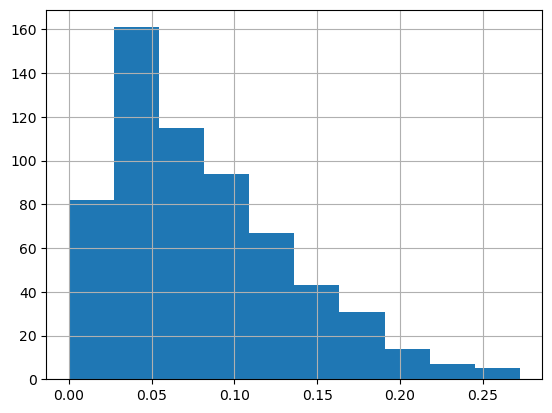

In [504]:
mart_author['engagement_rate'].hist()

In [505]:
def get_trending(engagement_rate_percentile):
    if engagement_rate_percentile >= 0.5:
        return 1
    else:
        return 0

mart_author['trending'] = mart_author['engagement_rate'].rank(pct=True).apply(get_trending)
mart_author[['engagement_rate','trending']]

,engagement_rate,trending
0,0.066719,0
1,0.030577,0
2,0.049555,0
3,0.075971,1
4,0.096744,1
...,...,...
614,0.047094,0
615,0.168145,1
616,0.030573,0
617,0.153374,1


### 🎯 2. Curate Classification Feature Set

A focused feature set was created to maximize model explainability and minimize data leakage:
- Creator-level metrics: `followers`, `videoscount`, `ads`
- Content attributes: `duration_sec`
- Content themes: `is_labubu`,`is_crybaby`, `is_hirono`, `is_skullpanda`,`is_unboxing`, `is_blindbox`, `is_recommendations`, `is_cute`,
  
All features are available **prior to post virality**, ensuring practical pre-publishing predictability.

In [506]:
mart_author.columns

Index(['author', 'nickname', 'followers', 'videoscount', 'accounttype',
       'accountstatus', 'sellerstatus', 'posturl', 'webvideourl', 'caption',
       'ads', 'mute', 'likes', 'shares', 'views', 'comments', 'duration_sec',
       'created_at', 'engagement_rate', 'like_rate', 'share_rate',
       'comment_rate', 'is_labubu', 'is_skullpanda', 'is_crybaby', 'is_hirono',
       'is_unboxing', 'is_blindbox', 'is_recommendation', 'is_cute',
       'virality', 'trending'],
      dtype='object')

In [507]:
feature_name_cla = [
    'followers',
    'videoscount',
    'ads',
    'duration_sec',
    'is_labubu',
    'is_skullpanda',
    'is_crybaby',
    'is_hirono',
    'is_unboxing',
    'is_blindbox',
    'is_recommendation',
    'is_cute'
]

In [508]:
x_cla = mart_author[feature_name_cla]
y_virality = mart_author['virality']
y_trending = mart_author['trending']

### ✂️ 3. Train-Test Split & Baseline Logistic Regression

- Data was split into **70% training** and **30% testing** using `train_test_split`.
- Initial Logistic Regression was applied to predict virality.
- **Severe class imbalance** was observed due to low proportion of viral posts.

In [509]:
x_cla_train, x_cla_test, y_virality_train, y_virality_test = train_test_split(x_cla, y_virality, test_size = 0.3, random_state = 42)

In [510]:
x_cla_train[['followers','videoscount','duration_sec']] = sc.fit_transform(x_cla_train[['followers','videoscount','duration_sec']].apply(np.log1p))
x_cla_test[['followers','videoscount','duration_sec']] = sc.transform(x_cla_test[['followers','videoscount','duration_sec']].apply(np.log1p))
x_cla_train['ads'] = le.fit_transform(x_cla_train['ads'])
x_cla_test['ads'] = le.transform(x_cla_test['ads'])

In [511]:
logit_virality = LogisticRegression()
logit_virality.fit(x_cla_train, y_virality_train)

LogisticRegression()

In [512]:
logit_virality_pred = logit_virality.predict(x_cla_test)
logit_virality_prob = logit_virality.predict_proba(x_cla_test)[:,1]

In [513]:
# 2. Compute and print binary‐classification metrics
print("Accuracy:           ", accuracy_score(y_virality_test, logit_virality_pred))
print("Precision:          ", precision_score(y_virality_test, logit_virality_pred))
print("Recall:             ", recall_score(y_virality_test, logit_virality_pred))
print("F1 Score:           ", f1_score(y_virality_test, logit_virality_pred))
print("ROC AUC:            ", roc_auc_score(y_virality_test, logit_virality_prob))

Accuracy:            0.9193548387096774
Precision:           0.0
Recall:              0.0
F1 Score:            0.0
ROC AUC:             0.6393762183235868


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


🛠️ **Imbalance Handling**
- Applied **SMOTE (Synthetic Minority Oversampling Technique)** on the training set to oversample the minority (viral) class.
- Re-trained the logistic regression model on the balanced dataset to improve recall.

In [514]:
y_virality_train.value_counts()

virality
0    386
1     47
Name: count, dtype: int64

In [515]:
from imblearn.over_sampling import SMOTE

In [516]:
smote = SMOTE(
    sampling_strategy = 'auto',
    random_state = 42
)

x_cla_train_sm, y_virality_train_sm = smote.fit_resample(x_cla_train, y_virality_train)

In [517]:
x_cla_train_sm.shape

(772, 12)

In [518]:
y_virality_train_sm.shape

(772,)

In [519]:
logit_virality_sm = LogisticRegression(class_weight='balanced')
logit_virality_sm.fit(x_cla_train_sm, y_virality_train_sm)

LogisticRegression(class_weight='balanced')

In [520]:
logit_virality_sm_pred = logit_virality_sm.predict(x_cla_test)
logit_virality_sm_prob = logit_virality_sm.predict_proba(x_cla_test)[:,1]

In [521]:
# 2. Compute and print binary‐classification metrics
print("Accuracy:           ", accuracy_score(y_virality_test, logit_virality_sm_pred))
print("Precision:          ", precision_score(y_virality_test, logit_virality_sm_pred))
print("Recall:             ", recall_score(y_virality_test, logit_virality_sm_pred))
print("F1 Score:           ", f1_score(y_virality_test, logit_virality_sm_pred))
print("ROC AUC:            ", roc_auc_score(y_virality_test, logit_virality_sm_prob))

Accuracy:            0.6881720430107527
Precision:           0.12280701754385964
Recall:              0.4666666666666667
F1 Score:            0.19444444444444442
ROC AUC:             0.6475633528265107


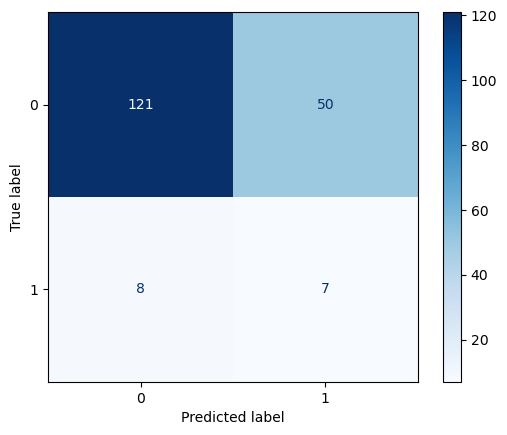

In [522]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_virality = confusion_matrix(y_virality_test, logit_virality_sm_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm_virality,
                             display_labels = logit_virality_sm.classes_)
cmd.plot(cmap='Blues')

### 📈 4. Logistic Regression Evaluation

#### 🔢 Model Metrics:
- Accuracy, Precision, Recall, F1 Score, and ROC-AUC were calculated.
- **Confusion Matrix** was plotted to show TP, FP, FN, TN distributions.

In [523]:
logit_virality_coefs = logit_virality_sm.coef_[0]
logit_virality_coefs

array([ 1.3008342 , -0.54356007,  1.16884165,  0.30236829,  1.12551042,
       -2.31281923, -1.26060553, -2.09062119, -0.19907986, -0.31515517,
       -0.15838788, -1.4833293 ])

#### 📊 Feature Importance:
Two methods were used to interpret feature weights:
- **Min-Max Normalization**: Rescales all coefficients to range [0, 1] for easier comparison.
- **Proportional Contribution**: Scales importance as percentage of total weight contribution.

This helped uncover high-impact features like `followers`, `ads`, and `is_labubu`.

In [524]:
logit_virality_feature_imp_prop = np.abs(logit_virality_coefs) / np.abs(logit_virality_coefs).sum()
logit_virality_feature_imp_minmax = (np.abs(logit_virality_coefs) - np.abs(logit_virality_coefs).min()) / (np.abs(logit_virality_coefs).max() - np.abs(logit_virality_coefs).min())

In [525]:
logit_virality_feature_imp_prop

array([0.1060943 , 0.04433203, 0.09532917, 0.02466075, 0.09179513,
       0.18863045, 0.1028133 , 0.17050828, 0.01623669, 0.02570364,
       0.0129179 , 0.12097836])

In [526]:
logit_virality_feature_imp_minmax

array([0.53027743, 0.17878137, 0.46901182, 0.06682989, 0.44889922,
       1.        , 0.51160491, 0.89686465, 0.01888757, 0.07276504,
       0.        , 0.61498428])

In [527]:
logit_virality_coefs_imp = pd.DataFrame(
    {
        'coefs':feature_name_cla,
        'raw_coefs':logit_virality_coefs,
        'Proportional_ImpScore':logit_virality_feature_imp_prop,
        'MinMax_ImpScore':logit_virality_feature_imp_minmax
    }
)

logit_virality_coefs_imp.sort_values('MinMax_ImpScore', ascending=False)

,coefs,raw_coefs,Proportional_ImpScore,MinMax_ImpScore
5,is_skullpanda,-2.312819,0.188630,1.000000
7,is_hirono,-2.090621,0.170508,0.896865
11,is_cute,-1.483329,0.120978,0.614984
0,followers,1.300834,0.106094,0.530277
6,is_crybaby,-1.260606,0.102813,0.511605
2,ads,1.168842,0.095329,0.469012
4,is_labubu,1.125510,0.091795,0.448899
1,videoscount,-0.543560,0.044332,0.178781
9,is_blindbox,-0.315155,0.025704,0.072765
3,duration_sec,0.302368,0.024661,0.066830


### 🌲 5. Tune Decision Tree & Random Forest Classifiers

- Used **GridSearchCV** to optimize hyperparameters (`max_depth`, `min_samples_split`, `min_samples_leaf`, `n_estimators` etc.).
- The models were **refit using `recall` as the scoring metric**, reflecting business preference to **not miss** viral content.
- Best models were stored and later compared across both virality and trending outcomes.

In [528]:
dtc = DecisionTreeClassifier()

params_grid = {
    'max_depth':[None, 5, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc_grid = GridSearchCV(
    estimator=dtc,
    param_grid=params_grid,
    cv=5,
    scoring='recall',
    n_jobs=1,
    verbose=1
)

In [529]:
dtc_grid.fit(x_cla_train_sm, y_virality_train_sm)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=1)

In [530]:
dtc_grid_virality_pred = dtc_grid.predict(x_cla_test)
dtc_grid_virality_prob = dtc_grid.predict_proba(x_cla_test)[:,1]

In [531]:
# 2. Compute and print binary‐classification metrics
print("Accuracy:           ", accuracy_score(y_virality_test, dtc_grid_virality_pred))
print("Precision:          ", precision_score(y_virality_test, dtc_grid_virality_pred))
print("Recall:             ", recall_score(y_virality_test, dtc_grid_virality_pred))
print("F1 Score:           ", f1_score(y_virality_test, dtc_grid_virality_pred))
print("ROC AUC:            ", roc_auc_score(y_virality_test, dtc_grid_virality_prob))

Accuracy:            0.5
Precision:           0.11
Recall:              0.7333333333333333
F1 Score:            0.19130434782608696
ROC AUC:             0.6372319688109161


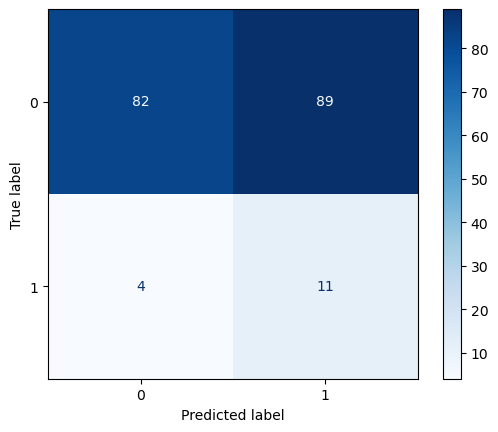

In [532]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_virality_dtc = confusion_matrix(y_virality_test, dtc_grid_virality_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm_virality_dtc,
                             display_labels = dtc_grid.classes_)
cmd.plot(cmap='Blues')

In [533]:
dtc_grid.best_score_

0.9558441558441558

In [534]:
dtc_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [538]:
dtc_virality_feature_imp = dtc_grid.best_estimator_.feature_importances_
dtc_virality_coefs_imp = pd.DataFrame(
    {'coefs':feature_name_cla,
     'feature_imp':dtc_virality_feature_imp
    }
)

dtc_virality_coefs_imp.sort_values('feature_imp', ascending=False)

,coefs,feature_imp
0,followers,0.642768
5,is_skullpanda,0.163576
1,videoscount,0.097701
7,is_hirono,0.081111
8,is_unboxing,0.007917
3,duration_sec,0.006928
2,ads,0.000000
4,is_labubu,0.000000
6,is_crybaby,0.000000
9,is_blindbox,0.000000


In [539]:
param_grid = {
    'n_estimators':     [100, 300, 500],
    'max_depth':        [None, 5, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestClassifier()

In [540]:
rfc_grid = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='recall',    # optimize recall
    cv=5,
    n_jobs=1,           
    verbose=1
)

In [541]:
rfc_grid.fit(x_cla_train_sm, y_virality_train_sm)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='recall', verbose=1)

In [542]:
rfc_grid.best_score_

0.9714285714285715

In [543]:
rfc_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [544]:
rfc_virality_pred = rfc_grid.predict(x_cla_test)
rfc_virality_prob = rfc_grid.predict_proba(x_cla_test)[:,1]

In [545]:
# 2. Compute and print binary‐classification metrics
print("Accuracy:           ", accuracy_score(y_virality_test, rfc_virality_pred))
print("Precision:          ", precision_score(y_virality_test, rfc_virality_pred))
print("Recall:             ", recall_score(y_virality_test, rfc_virality_pred))
print("F1 Score:           ", f1_score(y_virality_test, rfc_virality_pred))
print("ROC AUC:            ", roc_auc_score(y_virality_test, rfc_virality_prob))

Accuracy:            0.6451612903225806
Precision:           0.11940298507462686
Recall:              0.5333333333333333
F1 Score:            0.19512195121951217
ROC AUC:             0.6799220272904484


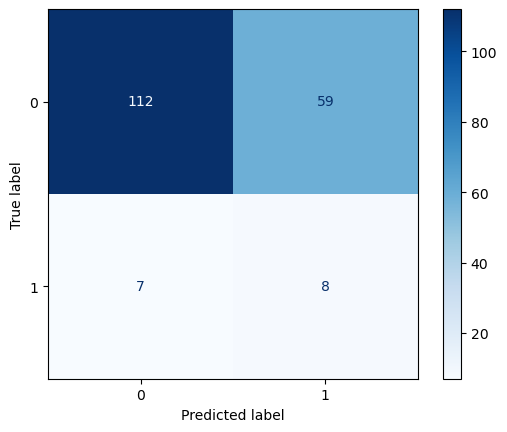

In [546]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_virality_rfc = confusion_matrix(y_virality_test, rfc_virality_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm_virality_rfc,
                             display_labels = rfc_grid.classes_)
cmd.plot(cmap='Blues')

In [547]:
rfc_virality_feature_imp = rfc_grid.best_estimator_.feature_importances_
rfc_virality_coefs_imp = pd.DataFrame(
    {'coefs':feature_name_cla,
     'feature_imp':rfc_virality_feature_imp
    }
)

rfc_virality_coefs_imp.sort_values('feature_imp', ascending=False)

,coefs,feature_imp
0,followers,0.389468
1,videoscount,0.171517
3,duration_sec,0.126153
5,is_skullpanda,0.096100
4,is_labubu,0.047669
6,is_crybaby,0.040956
7,is_hirono,0.033712
11,is_cute,0.033090
8,is_unboxing,0.024591
9,is_blindbox,0.022164


In [548]:
x_cla = mart_author[feature_name_cla]
y_virality = mart_author['virality']
y_trending = mart_author['trending']

### 🔄 6. Repeat Workflow for Trending Prediction

All steps above were mirrored for **trending label**. The same feature set was used to ensure parity for comparison.

In [549]:
x_cla_train, x_cla_test, y_trending_train, y_trending_test = train_test_split(x_cla, y_trending, test_size = 0.3, random_state = 42)

In [550]:
x_cla_train[['followers','videoscount','duration_sec']] = sc.fit_transform(x_cla_train[['followers','videoscount','duration_sec']].apply(np.log1p))
x_cla_test[['followers','videoscount','duration_sec']] = sc.transform(x_cla_test[['followers','videoscount','duration_sec']].apply(np.log1p))
x_cla_train['ads'] = le.fit_transform(x_cla_train['ads'])
x_cla_test['ads'] = le.transform(x_cla_test['ads'])

In [551]:
y_trending_train.value_counts()

trending
0    223
1    210
Name: count, dtype: int64

In [552]:
y_trending_test.value_counts()

trending
1    100
0     86
Name: count, dtype: int64

In [553]:
logit_trending = LogisticRegression(class_weight='balanced')
logit_trending.fit(x_cla_train, y_trending_train)

LogisticRegression(class_weight='balanced')

In [554]:
logit_trending_pred = logit_trending.predict(x_cla_test)
logit_trending_prob = logit_trending.predict_proba(x_cla_test)[:,1]

In [555]:
# 2. Compute and print binary‐classification metrics
print("Accuracy:           ", accuracy_score(y_trending_test, logit_trending_pred))
print("Precision:          ", precision_score(y_trending_test, logit_trending_pred))
print("Recall:             ", recall_score(y_trending_test, logit_trending_pred))
print("F1 Score:           ", f1_score(y_trending_test, logit_trending_pred))
print("ROC AUC:            ", roc_auc_score(y_trending_test, logit_trending_prob))

Accuracy:            0.6236559139784946
Precision:           0.6829268292682927
Recall:              0.56
F1 Score:            0.6153846153846154
ROC AUC:             0.6968604651162791


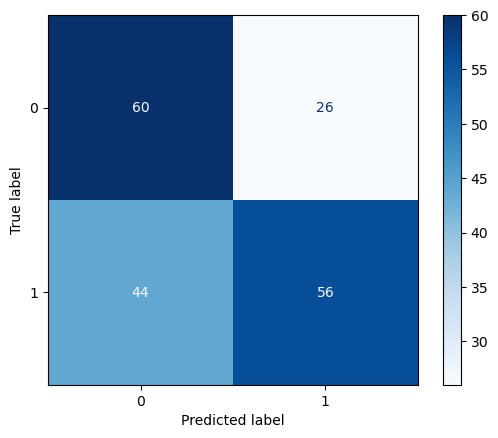

In [556]:
cm_trending = confusion_matrix(y_trending_test, logit_trending_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm_trending,
                             display_labels = logit_trending.classes_)
cmd.plot(cmap='Blues')

In [557]:
logit_trending_coefs = logit_trending.coef_[0]
logit_trending_feature_imp_prop = np.abs(logit_trending_coefs) / np.abs(logit_trending_coefs).sum()
logit_trending_feature_imp_minmax = (np.abs(logit_trending_coefs) - np.abs(logit_trending_coefs).min()) / (np.abs(logit_trending_coefs).max() - np.abs(logit_trending_coefs).min())

In [558]:
logit_trending_coefs_imp = pd.DataFrame(
    {
        'coefs':feature_name_cla,
        'raw_coefs':logit_trending_coefs,
        'Proportional_ImpScore':logit_trending_feature_imp_prop,
        'MinMax_ImpScore':logit_trending_feature_imp_minmax
    }
)

logit_trending_coefs_imp.sort_values('MinMax_ImpScore', ascending=False)

,coefs,raw_coefs,Proportional_ImpScore,MinMax_ImpScore
7,is_hirono,1.680476,0.290112,1.000000
2,ads,0.861909,0.148797,0.455358
0,followers,0.617410,0.106588,0.292679
8,is_unboxing,0.409733,0.070735,0.154498
10,is_recommendation,-0.391573,0.067600,0.142416
6,is_crybaby,0.356500,0.061545,0.119080
9,is_blindbox,-0.345374,0.059624,0.111677
4,is_labubu,-0.305204,0.052690,0.084949
1,videoscount,-0.275005,0.047476,0.064856
3,duration_sec,0.187434,0.032358,0.006590


In [559]:
dtc_grid.fit(x_cla_train, y_trending_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=1)

In [560]:
dtc_grid.best_score_

0.638095238095238

In [561]:
dtc_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [565]:
dtc_trending_pred = dtc_grid.predict(x_cla_test)
dtc_trending_prob = dtc_grid.predict_proba(x_cla_test)[:,1]

In [566]:
# 2. Compute and print binary‐classification metrics
print("Accuracy:           ", accuracy_score(y_trending_test, dtc_trending_pred))
print("Precision:          ", precision_score(y_trending_test, dtc_trending_pred))
print("Recall:             ", recall_score(y_trending_test, dtc_trending_pred))
print("F1 Score:           ", f1_score(y_trending_test, dtc_trending_pred))
print("ROC AUC:            ", roc_auc_score(y_trending_test, dtc_trending_prob))

Accuracy:            0.6075268817204301
Precision:           0.6666666666666666
Recall:              0.54
F1 Score:            0.5966850828729282
ROC AUC:             0.6045348837209302


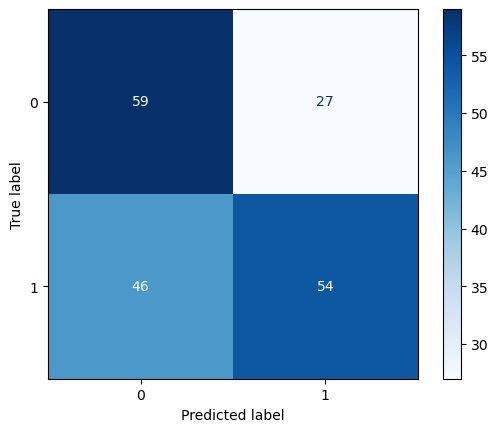

In [567]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_trending_dtc = confusion_matrix(y_trending_test, dtc_trending_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm_trending_dtc,
                             display_labels = dtc_grid.classes_)
cmd.plot(cmap='Blues')

In [568]:
dtc_trending_feature_imp = dtc_grid.best_estimator_.feature_importances_
dtc_trending_coefs_imp = pd.DataFrame(
    {'coefs':feature_name_cla,
     'feature_imp':dtc_trending_feature_imp
    }
)

dtc_trending_coefs_imp.sort_values('feature_imp', ascending=False)

,coefs,feature_imp
0,followers,0.288798
3,duration_sec,0.279310
1,videoscount,0.264461
7,is_hirono,0.079250
4,is_labubu,0.026731
9,is_blindbox,0.023205
11,is_cute,0.019348
8,is_unboxing,0.010528
5,is_skullpanda,0.008369
2,ads,0.000000


In [569]:
rfc_grid.fit(x_cla_train, y_trending_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='recall', verbose=1)

In [570]:
rfc_trending_pred = rfc_grid.predict(x_cla_test)
rfc_trending_prob = rfc_grid.predict_proba(x_cla_test)[:,1]

In [571]:
# 2. Compute and print binary‐classification metrics
print("Accuracy:           ", accuracy_score(y_trending_test, rfc_trending_pred))
print("Precision:          ", precision_score(y_trending_test, rfc_trending_pred))
print("Recall:             ", recall_score(y_trending_test, rfc_trending_pred))
print("F1 Score:           ", f1_score(y_trending_test, rfc_trending_pred))
print("ROC AUC:            ", roc_auc_score(y_trending_test, rfc_trending_prob))

Accuracy:            0.6827956989247311
Precision:           0.7530864197530864
Recall:              0.61
F1 Score:            0.6740331491712707
ROC AUC:             0.7608139534883721


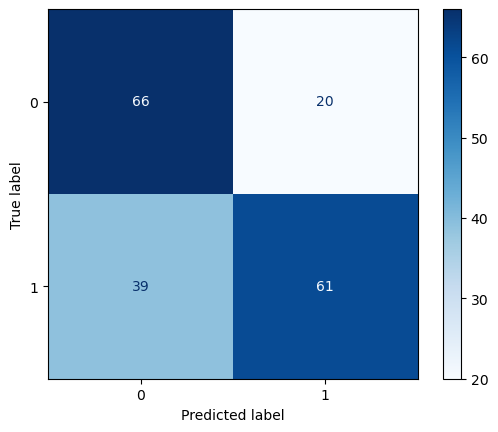

In [572]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_trending_rfc = confusion_matrix(y_trending_test, rfc_trending_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm_trending_rfc,
                             display_labels = rfc_grid.classes_)
cmd.plot(cmap='Blues')

In [577]:
rfc_trending_feature_imp = rfc_grid.best_estimator_.feature_importances_
rfc_trending_coefs_imp = pd.DataFrame(
    {'coefs':feature_name_cla,
     'feature_imp':rfc_trending_feature_imp
    }
)

rfc_trending_coefs_imp.sort_values('feature_imp', ascending=False)

,coefs,feature_imp
3,duration_sec,0.284042
0,followers,0.267544
1,videoscount,0.235758
7,is_hirono,0.039388
4,is_labubu,0.037737
8,is_unboxing,0.032349
9,is_blindbox,0.031163
6,is_crybaby,0.020288
11,is_cute,0.017044
5,is_skullpanda,0.016594


In [578]:
acc_logit, pre_logit, recall_logit, f1_logit, roc_auc_logit = accuracy_score(y_virality_test, logit_virality_sm_pred), precision_score(y_virality_test, logit_virality_sm_pred), recall_score(y_virality_test, logit_virality_sm_pred), f1_score(y_virality_test, logit_virality_sm_pred), roc_auc_score(y_virality_test, logit_virality_sm_prob)
acc_dt, prec_dt, rec_dt, f1_dt, auc_dt = accuracy_score(y_virality_test, dtc_grid_virality_pred), precision_score(y_virality_test, dtc_grid_virality_pred), recall_score(y_virality_test, dtc_grid_virality_pred), f1_score(y_virality_test, dtc_grid_virality_pred), roc_auc_score(y_virality_test, dtc_grid_virality_prob)
acc_rf, prec_rf, rec_rf, f1_rf, auc_rf = accuracy_score(y_virality_test, rfc_virality_pred), precision_score(y_virality_test, rfc_virality_pred), recall_score(y_virality_test, rfc_virality_pred), f1_score(y_virality_test, rfc_virality_pred), roc_auc_score(y_virality_test, rfc_virality_prob)

## 📊 Model Comparison Summary: Virality & Trending Classification

### 🔥 Virality Prediction (Views ≥ 90th percentile)

**Interpretation & Business Insights:**

- **Logistic Regression** performs well in terms of accuracy, but its relatively low recall (0.47) means it misses over half of the truly viral posts. In real-time content operations, this can result in underestimating breakout content potential.
- **Decision Tree** offers the **highest recall (0.73)**, meaning it captures most of the viral content. This is valuable for content strategists aiming to surface high-potential videos early, even at the expense of some false positives.
- **Random Forest** balances performance across all metrics, delivering the best F1 Score and ROC AUC. This makes it the most reliable model for **operational deployment**, particularly when both precision and recall matter (e.g., in automated boosting or influencer selection).

**Recommendation:**  
Use **Random Forest** for robust, production-ready virality detection. Use **Decision Tree** if the focus is strictly on **maximizing recall** (e.g., identifying all potential virals for human review or A/B testing prioritization).

### 📈 Trending Prediction (Engagement Rate ≥ 50th percentile)

**Interpretation & Business Insights:**

- **Trending content**, driven by high engagement rates, is a strong proxy for audience affinity and community response. This outcome is particularly relevant for **content calendar planning, recommendation systems, and artist-campaign pairings**.
- **Random Forest** shows a clear advantage in all key metrics. Its **higher precision (0.75)** ensures that most of the posts flagged as trending genuinely deliver strong engagement, which is essential for avoiding false promotions or misaligned budget allocation.
- **Logistic Regression** offers solid interpretability with relatively competitive performance, but does not outperform Random Forest in any metric.
- **Decision Tree**, while transparent, slightly underperforms in both predictive power and generalization.

**Recommendation:**  
Adopt **Random Forest** for **trending prediction pipelines**, particularly when making data-driven decisions around creator partnerships, ad placement, or content amplification.

In [579]:
virality_model_metrics_compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [acc_logit, acc_dt, acc_rf],
    'Precision': [pre_logit, prec_dt, prec_rf],
    'Recall': [recall_logit, rec_dt, rec_rf],
    'F1 Score': [f1_logit, f1_dt, f1_rf],
    'ROC AUC': [roc_auc_logit, auc_dt, auc_rf]
}
)

virality_model_metrics_compare

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.688172,0.122807,0.466667,0.194444,0.647563
1,Decision Tree,0.500000,0.110000,0.733333,0.191304,0.637232
2,Random Forest,0.645161,0.119403,0.533333,0.195122,0.679922


In [580]:
acc_logit, pre_logit, recall_logit, f1_logit, roc_auc_logit = accuracy_score(y_trending_test, logit_trending_pred), precision_score(y_trending_test, logit_trending_pred), recall_score(y_trending_test, logit_trending_pred), f1_score(y_trending_test, logit_trending_pred), roc_auc_score(y_trending_test, logit_trending_prob)
acc_dt, prec_dt, rec_dt, f1_dt, auc_dt = accuracy_score(y_trending_test, dtc_trending_pred), precision_score(y_trending_test, dtc_trending_pred), recall_score(y_trending_test, dtc_trending_pred), f1_score(y_trending_test, dtc_trending_pred), roc_auc_score(y_trending_test, dtc_trending_prob)
acc_rf, prec_rf, rec_rf, f1_rf, auc_rf = accuracy_score(y_trending_test, rfc_trending_pred), precision_score(y_trending_test, rfc_trending_pred), recall_score(y_trending_test, rfc_trending_pred), f1_score(y_trending_test, rfc_trending_pred), roc_auc_score(y_trending_test, rfc_trending_prob)

In [581]:
trending_model_metrics_compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [acc_logit, acc_dt, acc_rf],
    'Precision': [pre_logit, prec_dt, prec_rf],
    'Recall': [recall_logit, rec_dt, rec_rf],
    'F1 Score': [f1_logit, f1_dt, f1_rf],
    'ROC AUC': [roc_auc_logit, auc_dt, auc_rf]
}
)

trending_model_metrics_compare

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.623656,0.682927,0.56,0.615385,0.696860
1,Decision Tree,0.607527,0.666667,0.54,0.596685,0.604535
2,Random Forest,0.682796,0.753086,0.61,0.674033,0.760814
